# Introduction  

The dataset selected contains the information of medical appointments in brazil and is available [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments?select=KaggleV2-May-2016.csv). This project aim to use the provided dataset to answer some questions which are being asked through Exploratory data analysis(EDA) 

# Question asked 

Questions are subdivided into two main parts which are disease analysis and non show analysis 

###### In disease analysis, I intend to answer the following questions:

1. Which disease has high number of patients ?
2. which category of age is more health compared to others ? 
3. which gender has a high number of patients ?
4. which are the top 10 Neighbourhood with high number of patients ? 

###### in no show analysis, I intend to answer the following questions: 

1. Among no show and show which has higher number ?
2. What really cause people to not showing up ?
3. which variable affect most the non-show ?
4. which most days of the appointments ? 

###### Used libraries 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

###### load dataset

In [2]:
def load_data(filepath):
    df = pd.read_csv(filepath)
    return df 

In [3]:
data = load_data('KaggleV2-May-2016.csv')

In [4]:
# print out five first rows 
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data wrangling

###### Dataset information 

In [5]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#dataset shape
data.shape

(110527, 14)

our dataset has 110527 observations and 14 features 

###### unique values 

In [7]:
data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
#checking for missing values 
data.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

no missing values 

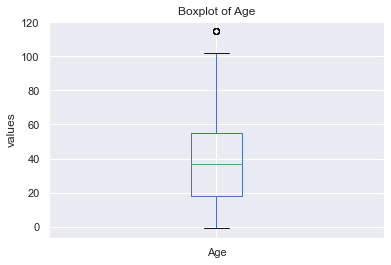

In [9]:
#checking for outliers
data['Age'].plot(kind="box")
plt.title('Boxplot of Age')
plt.ylabel('values');


In [10]:
#summary statistics 
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Age column seems to have an outtlier of around 120 years but in reality it might be possible so need to remove it 

# Exploratory Data analysis 

### Diseases analysis 

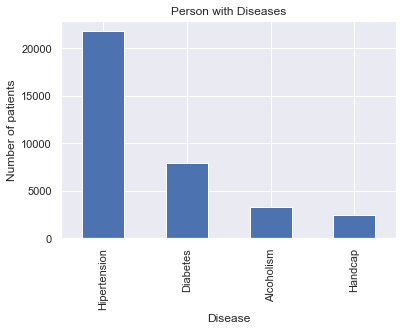

In [11]:
(data.iloc[:,np.r_[8,9,10,11]]).sum().plot(kind="bar")
plt.title('Person with Diseases')
plt.xlabel('Disease')
plt.ylabel('Number of patients');

The above graph describes diseases with patients. It can be seen that hypertension has highest number of patients followed by diabetes and alcoholism comes last. 

In [12]:
#create a group of age
age = list()
for i in data['Age']:
    if i < 18:
        age.append('Children')
        
    elif i >= 18 and i < 60:
        age.append('Adult')
        
    else:
        age.append('elders')
data['Age_category'] = age

In [13]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_category
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,elders
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,elders
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Children
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,Adult
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,Adult
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,Adult
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,Adult


In [14]:
#person with no disease (zeros to all rows in disease columns)
df_no_disease = data.query('Hipertension==0 and Diabetes==0 and Alcoholism==0 and Handcap==0')

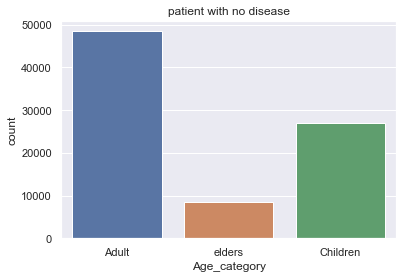

In [15]:
sns.countplot(data = df_no_disease,x="Age_category")
plt.title('patient with no disease');

Considering the age category created, we can see that adult group(18-60) has a high number of non patient compared to the other groups, elders has lower number of health people which is reasonable. 

In [16]:
#person with any disease 
df_any_disease = data.query('Hipertension !=0 or Diabetes !=0 or Alcoholism !=0 or Handcap !=0')

In [17]:
def univariate_plot(df,col,value):
    plt.figure(figsize=(10,8))
    df[col].value_counts().head(value).plot(kind="bar")
    plt.title('Top 10 Neighbourhoods with high number of patients')
    plt.xlabel(col)
    plt.ylabel('patients');
    

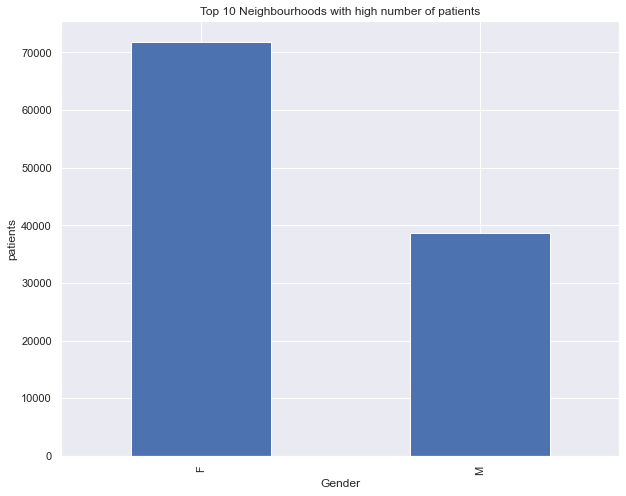

In [18]:
univariate_plot(data,'Gender',None)

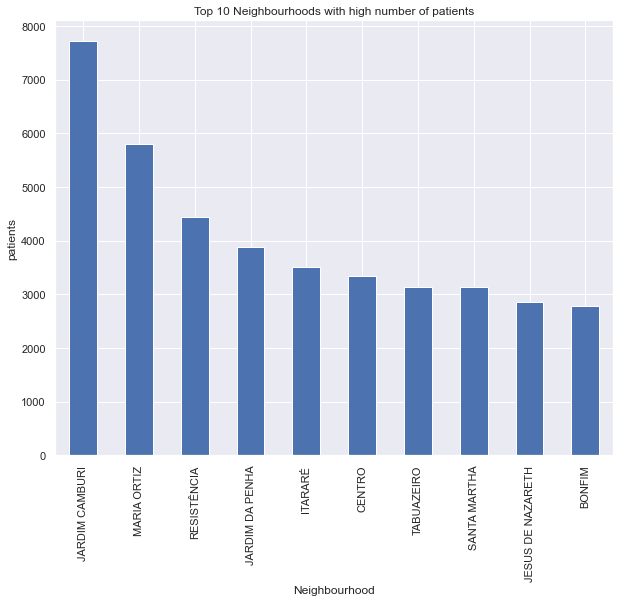

In [19]:
#patients in top 10 Neighbourhood
univariate_plot(data,'Neighbourhood',10)

From the graph, it can be seen that JARDIM CAMBURI Neighbourhood in brazil has a high number of patients compared to other Neighbourhoods in the same country. 

## No show analysis

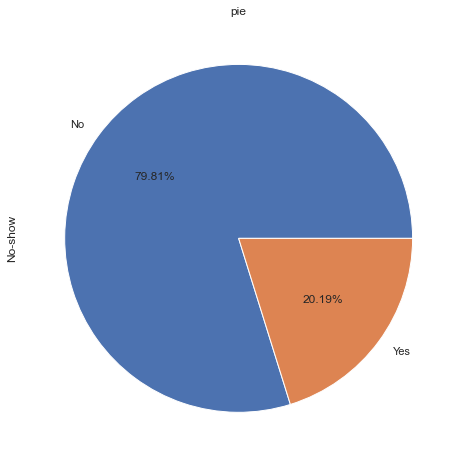

In [20]:
#no show vs show 
plt.figure(figsize=(10,8))
data['No-show'].value_counts().plot(kind="pie",autopct='%1.2f%%',title="pie");

The pie chart above describe the percentage of no show and show, it can be seen that show outweighted no show. Someone might be curious to know the cause of no show. 

In [21]:
#no show and show vs other features
def count_plot(df,col1,col2):
    sns.countplot(data=data, x=col1, hue=col2);
    plt.title(f"bar plot of no show in different {col2}")
    plt.show()

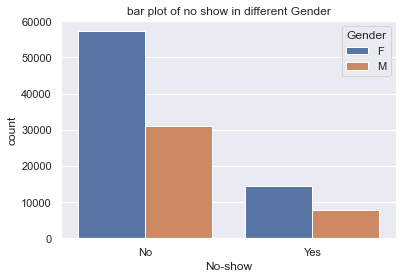

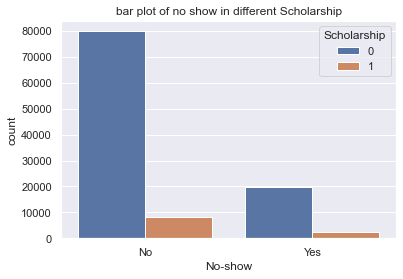

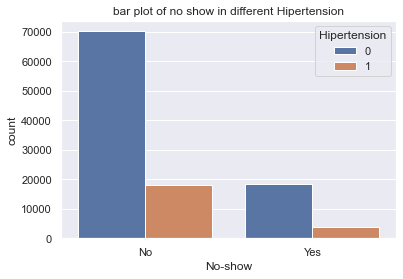

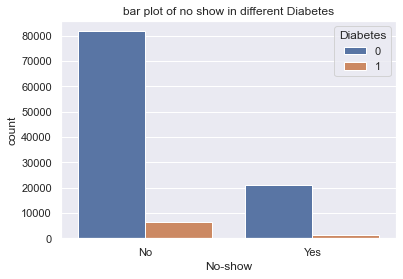

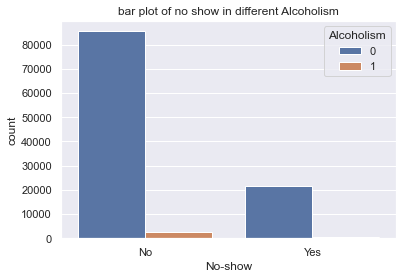

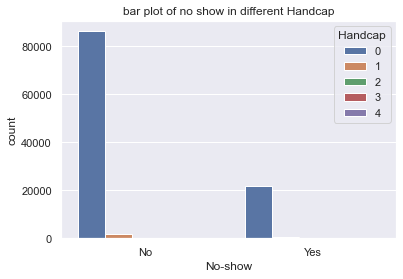

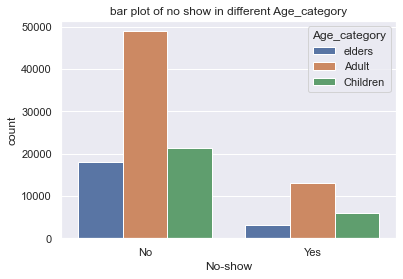

In [22]:
for i in data.iloc[:,np.r_[2,7:12,14]].columns.tolist():
    count_plot(data,'No-show',i)

the above graphs show the effects of different features including gender, age categories and different disease to no-show columns. To begin by gender, it can be seen that female group outweighted male one in both groups(no show and show). additionaly, people with no scholarship has high numnber in both groups. specifically, most of the people who didn't show up are those without scholarship. Furthermore, it can be seen that most of the people with no disease didn't show up comparing to the unhealthy one which is reasonable. 

To analysis it deeply we can even look at the relationship of those features to the no show variable

we might to encode some of the features to able to perform correlation analysis

In [23]:
#apply label encoding 
features_enc = ['Gender','No-show']
data[features_enc] = data[features_enc].apply(lambda x: pd.factorize(x)[0])

In [24]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_category
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,elders
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Adult
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,elders
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Children
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Adult


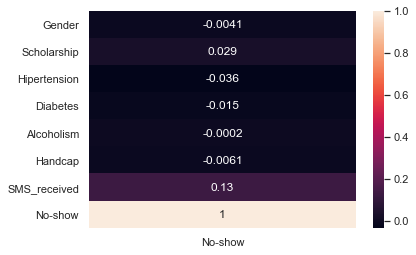

In [25]:
sns.heatmap(data.iloc[:,np.r_[2,7:14]].corr()[['No-show']],annot=True);

sms_received seems to have a fair relationship compared to others, this can be helpful in increasing the number of people that show up. Increase ways of communicating people through messages might boost the presence of people at hospital 

In [26]:
# convert date column from object to datetime
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  int64              
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

###### feature extraction

we are going to extract weekdays in datetime column

In [28]:
data['scheduled_days'] = data['ScheduledDay'].dt.dayofweek
data['Appoint_days'] = data['AppointmentDay'].dt.dayofweek

In [29]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_category,scheduled_days,Appoint_days
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,elders,4,4
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Adult,4,4
2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,elders,4,4
3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Children,4,4
4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Adult,4,4


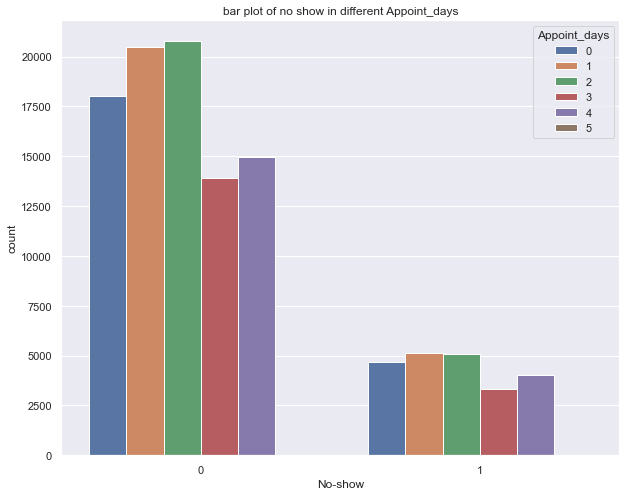

In [30]:
plt.figure(figsize=(10,8))
count_plot(data,'No-show','Appoint_days')

on Tuesday and wednesday,people used to show up and not, which means those might be the days of appointments 

# Conclusion  

Project comprised of four main parts, which introduction whereby we introduced the project, questions asked include questions needed to be answered through data analysis, data wrangling whereby we tried to study the data looking at missing values,outliers and any kind of anomalies. Through that part, quantitive summary of the dataset were provided and other helpful information on the dataset. In Exploratory Data Analysis(EDA), questions were successful answered. To begin with disease analysis questions, we have seen that hypertension disease has high number of patient compared to other diseases. Categories like elders and Female seems to be unhealthy since they have number of disease.Additionally, `JARDIM CAMBURI ` is the first Neighbourhood with high number of patients. 

When it comes to non show analysis, we came to find that a significant number have been showed up with 79.81 percent. Some causes of people not show up were analysed using different features and as a result, we found that people with no scholarship, people with no disease and elders are not likely to show up. With EDA, we also came to find that tuesday and wednesday are days with more appointments 

# Limitations 

1. I was limited to poor information of the data. Through this project I didn't find metadata of the dataset and I was struggling to understand some of the features. For instance, handcap, on kaggle we have true and false, while in dataset we have 0 up to 4, I didn't understand those values. 


2. Most numeric values were O and 1, I was limited to come up with other graphs like scatter plot 